In [14]:
from typing import TypedDict
from langgraph.graph import StateGraph,START, END


In [15]:
%pip install langchain-ollama
from langchain_ollama import ChatOllama

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
class FactoryState(TypedDict):
    # Strict typing for our data
    count: int
    message: str
                 

In [17]:
def worker_node1(state:FactoryState) -> dict:
    print("Working1...")
    # Return a dictionary update
    return {"count": state['count'] + 1}
    #return state

In [18]:
def worker_node2(state:FactoryState) -> FactoryState:
    print("Working2...") 
    llm=ChatOllama(model="llama3.2:3b")
    result = llm.invoke("What is the capital of France?")
    print("LLM Result:", result.content)
    # Return a dictionary update
    return state

In [19]:
workflow = StateGraph(FactoryState)


# Add Nodes
workflow.add_node("step_2", worker_node2)
workflow.add_node("step_1", worker_node1)






In [20]:
workflow.add_edge(START, "step_1")
workflow.add_edge("step_1","step_2")
workflow.add_edge("step_2", END)    

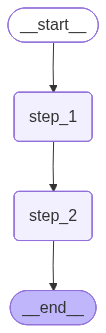

In [21]:
from IPython.display import Image, display

# Compile freezes the structure
app = workflow.compile()

display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
# Invoke starts the conveyor belt
initial_state={"count": 10}
result = app.invoke(initial_state)

Working1...
Working2...
LLM Result: The capital of France is Paris.


In [23]:
print("Final Result:", result)

Final Result: {'count': 11}
